# Introduction to pandas
* exploration of data
* visualization of data

Getting data, cleaning, exploring, visualizing, machine learning procedure

We will use the "auto-mpg.csv" dataset: The aim is to predict the fuel efficiency of a car (miles per gallon, mpg -this is the label-) based on other features (independent variables) of the car:
* number of cylinders in the engine
* displacement (volume of the engine in cubic inches)
* horsepower that the car can produce
* weight (in pounds)
* acceleration (time it takes for the car to go from 0 to 60 miles/hour)
* model year (implied 19**)
* car origin #MAIN DRAWBACK (ordinal encoding: 1 (North America), 2 (Europe), 3 (Japan))

In [1]:
import pandas as pd

In [2]:
#let's read a csv (comma separated values) file (headers, each row is a data point)
d = pd.read_csv('auto-mpg.csv')

In [3]:
d

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [4]:

d.origin = d.origin.replace({1: 'America', 2: 'Europe', 3: 'Japan'})

In [5]:
d

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,America
388,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
389,32.0,4,135.0,84.0,2295.0,11.6,82,America
390,28.0,4,120.0,79.0,2625.0,18.6,82,America


### One-hot encoding using Pandas

Do not do this in a Machine Learning project. Rather use pipelines.

In [6]:
#one-hot encoding
d.join(pd.get_dummies(d.origin)).rename(columns={i: f"origin_{i}" for i in d.origin.unique()}).drop(columns='origin')

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin_America,origin_Europe,origin_Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,True,False,False
1,15.0,8,350.0,165.0,3693.0,11.5,70,True,False,False
2,18.0,8,318.0,150.0,3436.0,11.0,70,True,False,False
3,16.0,8,304.0,150.0,3433.0,12.0,70,True,False,False
4,17.0,8,302.0,140.0,3449.0,10.5,70,True,False,False
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,True,False,False
388,44.0,4,97.0,52.0,2130.0,24.6,82,False,True,False
389,32.0,4,135.0,84.0,2295.0,11.6,82,True,False,False
390,28.0,4,120.0,79.0,2625.0,18.6,82,True,False,False


### Basic information about my data

In [7]:
#how many rows and columns?
d.shape

(392, 8)

In [8]:
#to access the column names
d.columns

Index(['mpg', 'cylinders', 'displacement', 'hp', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [9]:
# I can use it as if it was a list
for column in d.columns:
    print(column)

mpg
cylinders
displacement
hp
weight
acceleration
year
origin


In [10]:
#I can access a specific column in two ways. First way (here I cannot use white spaces in the name of the column)
d.mpg

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [11]:
#second way
d['mpg']

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64

In [12]:
type(d.mpg)

pandas.core.series.Series

In [13]:
type(d[['mpg']])

pandas.core.frame.DataFrame

In [14]:
#to print it in a nicer way, I can insert it in a dataframe by using "[" "]" (Jupyter notebooks know how to print dataframes)
d[['mpg']]

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
387,27.0
388,44.0
389,32.0
390,28.0


In [15]:
d[['mpg', 'hp']]

,mpg,hp
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
387,27.0,86.0
388,44.0,52.0
389,32.0,84.0
390,28.0,79.0


In [16]:
d.mpg.mean()

23.445918367346938

In [17]:
d.mpg.median()

22.75

In [18]:
d.mpg.min(), d.mpg.max()

(9.0, 46.6)

### Describe a dataframe

Pandas can return relevant statistics for each of the columns of your dataframe

In [19]:
d.describe()

,mpg,cylinders,displacement,hp,weight,acceleration,year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [20]:
#to reduce the number of decimals that make the statistics hard to read
d.describe().round(decimals=2)

,mpg,cylinders,displacement,hp,weight,acceleration,year
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


The "count" statistic is not redundant. E.g., if we don't work with clean data, some data might be missing for some independent variables. In that case, it will not show 392!

In [21]:
#if I want to get more percentiles
d.describe(percentiles=[.1, .25, .50, .75, .90]).round(decimals=2)

,mpg,cylinders,displacement,hp,weight,acceleration,year
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
10%,14.00,4.00,90.00,67.00,1990.00,12.00,71.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00
90%,34.19,8.00,350.00,157.70,4277.60,19.00,81.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


### Unique values in a column

Useful for categorical columns or numeric columns which only take a few values.

In [22]:
#give unique and distinct values of a column
d.year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82], dtype=int64)

In [23]:
d.cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [24]:
d.mpg.unique()

array([18. , 15. , 16. , 17. , 14. , 24. , 22. , 21. , 27. , 26. , 25. ,
       10. , 11. ,  9. , 28. , 19. , 12. , 13. , 23. , 30. , 31. , 35. ,
       20. , 29. , 32. , 33. , 17.5, 15.5, 14.5, 22.5, 24.5, 18.5, 29.5,
       26.5, 16.5, 31.5, 36. , 25.5, 33.5, 20.5, 30.5, 21.5, 43.1, 36.1,
       32.8, 39.4, 19.9, 19.4, 20.2, 19.2, 25.1, 20.6, 20.8, 18.6, 18.1,
       17.7, 27.5, 27.2, 30.9, 21.1, 23.2, 23.8, 23.9, 20.3, 21.6, 16.2,
       19.8, 22.3, 17.6, 18.2, 16.9, 31.9, 34.1, 35.7, 27.4, 25.4, 34.2,
       34.5, 31.8, 37.3, 28.4, 28.8, 26.8, 41.5, 38.1, 32.1, 37.2, 26.4,
       24.3, 19.1, 34.3, 29.8, 31.3, 37. , 32.2, 46.6, 27.9, 40.8, 44.3,
       43.4, 36.4, 44.6, 33.8, 32.7, 23.7, 32.4, 26.6, 25.8, 23.5, 39.1,
       39. , 35.1, 32.3, 37.7, 34.7, 34.4, 29.9, 33.7, 32.9, 31.6, 28.1,
       30.7, 24.2, 22.4, 34. , 38. , 44. ])

### Filtering a data-frame

In [25]:
#access only rows with year=70
d[d.year == 70] #in the squared parentheses, the filter (condition)

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America
5,15.0,8,429.0,198.0,4341.0,10.0,70,America
6,14.0,8,454.0,220.0,4354.0,9.0,70,America
7,14.0,8,440.0,215.0,4312.0,8.5,70,America
8,14.0,8,455.0,225.0,4425.0,10.0,70,America
9,15.0,8,390.0,190.0,3850.0,8.5,70,America


In [26]:
#combine filtering conditions --> Parentheses matter!

d[(d.year == 70 & d.origin == 'Japan')]

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [27]:
#combine filtering conditions
d[(d.year == 70) & (d.origin == 'Japan')]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
14,24.0,4,113.0,95.0,2372.0,15.0,70,Japan
18,27.0,4,97.0,88.0,2130.0,14.5,70,Japan


In [28]:
d[(d.year == 70) & (d.cylinders > 4)]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America
5,15.0,8,429.0,198.0,4341.0,10.0,70,America
6,14.0,8,454.0,220.0,4354.0,9.0,70,America
7,14.0,8,440.0,215.0,4312.0,8.5,70,America
8,14.0,8,455.0,225.0,4425.0,10.0,70,America
9,15.0,8,390.0,190.0,3850.0,8.5,70,America


In [29]:
d[d.cylinders <= 3]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
70,19.0,3,70.0,97.0,2330.0,13.5,72,Japan
110,18.0,3,70.0,90.0,2124.0,13.5,73,Japan
241,21.5,3,80.0,110.0,2720.0,13.5,77,Japan
331,23.7,3,70.0,100.0,2420.0,12.5,80,Japan


In [30]:
#OR operator
d[(d.origin == 'Europe') | (d.origin == 'Japan')]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
14,24.0,4,113.0,95.0,2372.0,15.0,70,Japan
18,27.0,4,97.0,88.0,2130.0,14.5,70,Japan
19,26.0,4,97.0,46.0,1835.0,20.5,70,Europe
20,25.0,4,110.0,87.0,2672.0,17.5,70,Europe
21,24.0,4,107.0,90.0,2430.0,14.5,70,Europe
...,...,...,...,...,...,...,...,...
377,38.0,4,91.0,67.0,1965.0,15.0,82,Japan
378,32.0,4,91.0,67.0,1965.0,15.7,82,Japan
379,38.0,4,91.0,67.0,1995.0,16.2,82,Japan
384,32.0,4,144.0,96.0,2665.0,13.9,82,Japan


In [31]:
not_america = ['Europe', 'Japan']
d[d.origin.isin(not_america)]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
14,24.0,4,113.0,95.0,2372.0,15.0,70,Japan
18,27.0,4,97.0,88.0,2130.0,14.5,70,Japan
19,26.0,4,97.0,46.0,1835.0,20.5,70,Europe
20,25.0,4,110.0,87.0,2672.0,17.5,70,Europe
21,24.0,4,107.0,90.0,2430.0,14.5,70,Europe
...,...,...,...,...,...,...,...,...
377,38.0,4,91.0,67.0,1965.0,15.0,82,Japan
378,32.0,4,91.0,67.0,1965.0,15.7,82,Japan
379,38.0,4,91.0,67.0,1995.0,16.2,82,Japan
384,32.0,4,144.0,96.0,2665.0,13.9,82,Japan


In [32]:
d[d.origin != 'America']

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
14,24.0,4,113.0,95.0,2372.0,15.0,70,Japan
18,27.0,4,97.0,88.0,2130.0,14.5,70,Japan
19,26.0,4,97.0,46.0,1835.0,20.5,70,Europe
20,25.0,4,110.0,87.0,2672.0,17.5,70,Europe
21,24.0,4,107.0,90.0,2430.0,14.5,70,Europe
...,...,...,...,...,...,...,...,...
377,38.0,4,91.0,67.0,1965.0,15.0,82,Japan
378,32.0,4,91.0,67.0,1965.0,15.7,82,Japan
379,38.0,4,91.0,67.0,1995.0,16.2,82,Japan
384,32.0,4,144.0,96.0,2665.0,13.9,82,Japan


## Aggregating data

In [33]:
d.groupby(by='origin').mean()[['mpg', 'hp']].round(decimals=2)

,mpg,hp
origin,,
America,20.03,119.05
Europe,27.60,80.56
Japan,30.45,79.84


In [34]:
d.groupby(by=['origin', 'cylinders']).mean().round(decimals=2)

mpg  displacement      hp   weight  acceleration   year
origin  cylinders                                                           
America 4          28.01        124.05   80.96  2427.39         16.47  78.04
        6          19.65        226.64   99.67  3218.55         16.47  75.66
        8          14.96        345.01  158.30  4114.72         12.96  73.90
Europe  4          28.11        104.61   78.31  2338.30         16.73  75.34
        5          27.37        145.00   82.33  3103.33         18.63  79.00
        6          20.10        159.75  113.50  3382.50         16.42  78.25
Japan   3          20.55         72.50   99.25  2398.50         13.25  75.50
        4          31.60         99.77   75.58  2153.49         16.57  77.51
        6          23.88        156.67  115.83  2882.00         13.55  78.00

In [35]:
d.groupby(by=['origin', 'cylinders']).mean().round(decimals=2)[['mpg']]

mpg
origin  cylinders       
America 4          28.01
        6          19.65
        8          14.96
Europe  4          28.11
        5          27.37
        6          20.10
Japan   3          20.55
        4          31.60
        6          23.88

In [36]:
d.pivot_table(values='mpg', index='origin', columns='cylinders').fillna(value='')

cylinders,3,4,5,6,8
origin,,,,,
America,,28.013043,,19.645205,14.963107
Europe,,28.106557,27.366667,20.100000,
Japan,20.55,31.595652,,23.883333,


In [37]:
d.pivot_table(index='year', columns=['cylinders', 'origin'], values='mpg').round(decimals=1).fillna('')

cylinders     3       4                   5       6                    8
origin    Japan America Europe Japan Europe America Europe Japan America
year                                                                    
70                        25.2  25.5           20.5                 14.1
71                 24.8   28.8  29.5           18.0                 13.4
72         19.0    23.2   22.0  25.5                                13.6
73         18.0    20.0   24.0  21.0           18.9         20.0    13.2
74                 26.3   27.0  29.3           17.3                 14.2
75                 23.0   24.5  27.5           17.6                 15.7
76                 26.2   25.4  31.0           20.6   16.5  19.0    14.7
77         21.5    28.2   29.2  30.2           18.9         22.0    16.0
78                 28.2   32.1  29.7   20.3    19.6   16.6          19.0
79                 30.9   32.1  33.0   25.4    23.0                 18.6
80         23.7    27.7   36.9  36.7   36.4    19.1         32.7        
81                 31.0   30.6  34.6           20.9   30.7  24.8    26.6
82                 30.1   40.0  34.9           28.3

# Adding a new column

In [38]:
d['displacement_cm3'] = d['displacement'] * 16.3871 # <====

In [39]:
d

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin,displacement_cm3
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,5030.8397
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,5735.4850
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,5211.0978
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,4981.6784
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,4948.9042
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,America,2294.1940
388,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,1589.5487
389,32.0,4,135.0,84.0,2295.0,11.6,82,America,2212.2585
390,28.0,4,120.0,79.0,2625.0,18.6,82,America,1966.4520


In [40]:
def in3_to_cm3(x: float):
    return x * 16.3871

In [41]:
d['displacement_cm3_lambda'] = d.apply(lambda row: in3_to_cm3(row.displacement), axis=1)

In [42]:
d

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin,displacement_cm3,displacement_cm3_lambda
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,5030.8397,5030.8397
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,5735.4850,5735.4850
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,5211.0978,5211.0978
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,4981.6784,4981.6784
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,4948.9042,4948.9042
...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,America,2294.1940,2294.1940
388,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,1589.5487,1589.5487
389,32.0,4,135.0,84.0,2295.0,11.6,82,America,2212.2585,2212.2585
390,28.0,4,120.0,79.0,2625.0,18.6,82,America,1966.4520,1966.4520


# Remove a column

In [43]:
d.drop(columns=['displacement_cm3', 'displacement_cm3_lambda'], inplace=True)

In [44]:
d

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,America
388,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
389,32.0,4,135.0,84.0,2295.0,11.6,82,America
390,28.0,4,120.0,79.0,2625.0,18.6,82,America


### Only for one column at a time

In [45]:
d['displacement_cm3'] = d['displacement'] * 16.3871

In [46]:
del d['displacement_cm3']

### What happens if I try to operate on a filtered `DataFrame`

In [47]:
old = d[d.year <= 75]

In [ ]:
old

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America
...,...,...,...,...,...,...,...,...
175,23.0,4,115.0,95.0,2694.0,15.0,75,Europe
176,23.0,4,120.0,88.0,2957.0,17.0,75,Europe
177,22.0,4,121.0,98.0,2945.0,14.5,75,Europe
178,25.0,4,121.0,115.0,2671.0,13.5,75,Europe


In [48]:
old['displacement_cm3'] = old.displacement * 16.3871

C:\Users\RC\AppData\Local\Temp\ipykernel_20860\3117675393.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old['displacement_cm3'] = old.displacement * 16.3871


In [49]:
old = d[d.year <= 75].copy()

In [50]:
old['displacement_cm3'] = old.displacement * 16.3871

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
p = d.pivot_table(index='year', columns='cylinders', values='mpg').round(decimals=1)

<Axes: xlabel='cylinders', ylabel='year'>

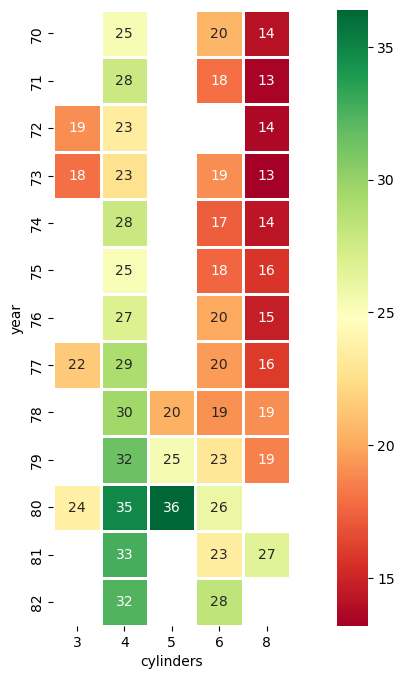

In [53]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(p, square=True, linewidths=1, annot=True, cmap=plt.cm.RdYlGn, ax=ax)

# Searching

In [54]:
d.query('mpg < 200')

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,America
388,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
389,32.0,4,135.0,84.0,2295.0,11.6,82,America
390,28.0,4,120.0,79.0,2625.0,18.6,82,America


In [55]:
d[d.mpg * 2 < 200]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,America
388,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
389,32.0,4,135.0,84.0,2295.0,11.6,82,America
390,28.0,4,120.0,79.0,2625.0,18.6,82,America


In [56]:
d[d.mpg.abs() < 100]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,America
1,15.0,8,350.0,165.0,3693.0,11.5,70,America
2,18.0,8,318.0,150.0,3436.0,11.0,70,America
3,16.0,8,304.0,150.0,3433.0,12.0,70,America
4,17.0,8,302.0,140.0,3449.0,10.5,70,America
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,America
388,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
389,32.0,4,135.0,84.0,2295.0,11.6,82,America
390,28.0,4,120.0,79.0,2625.0,18.6,82,America


In [57]:
import numpy as np

In [58]:
d[np.sqrt(d.mpg) > 5]

,mpg,cylinders,displacement,hp,weight,acceleration,year,origin
18,27.0,4,97.0,88.0,2130.0,14.5,70,Japan
19,26.0,4,97.0,46.0,1835.0,20.5,70,Europe
23,26.0,4,121.0,113.0,2234.0,12.5,70,Europe
29,27.0,4,97.0,88.0,2130.0,14.5,71,Japan
30,28.0,4,140.0,90.0,2264.0,15.5,71,America
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,America
388,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
389,32.0,4,135.0,84.0,2295.0,11.6,82,America
390,28.0,4,120.0,79.0,2625.0,18.6,82,America


In [59]:
#d.corr() #pay attention to categorical variables

numeric_d = d.select_dtypes(include=['number'])
numeric_d.corr()

,mpg,cylinders,displacement,hp,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


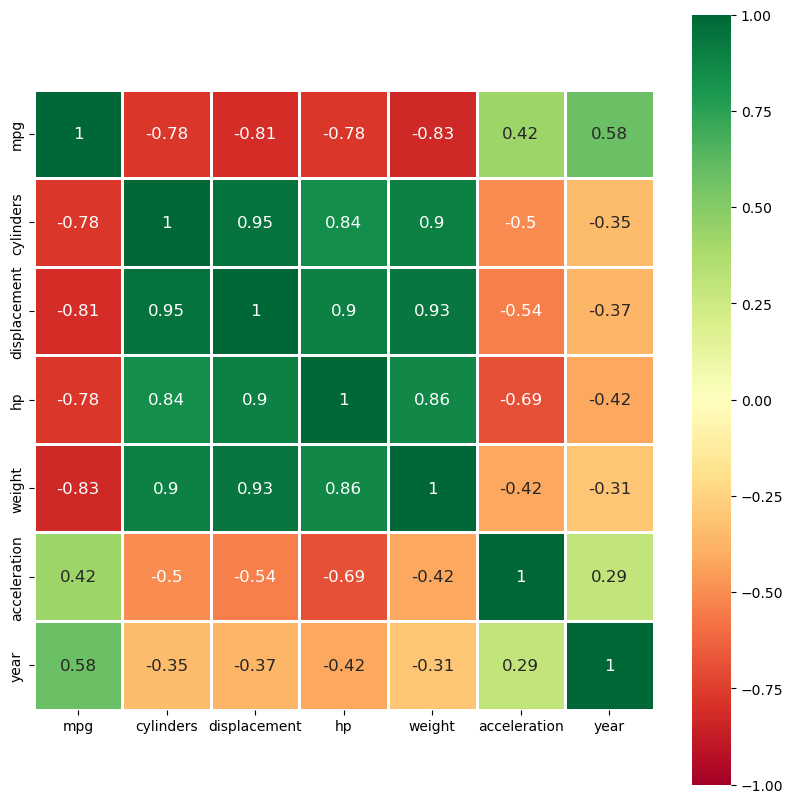

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(numeric_d.corr(), square=True, linewidths=1, annot=True, cmap=plt.cm.RdYlGn, vmin=-1, vmax=1, annot_kws={"size": 12}, ax=ax); #if errors, update seaborn and restart VScode
